In [1]:
import pandas as pd
import numpy as np

# create dataframe from dictionary

In [2]:
# data frames from dictionary
country = ["Spain","France"]
population = ["11","12"]
list_label = ["country","population"]
list_col = [country,population]
zipped = list(zip(list_label,list_col))
data_dict = dict(zipped)
df = pd.DataFrame(data_dict)
df

,country,population
0,Spain,11
1,France,12


In [2]:
raw_data = {'state' : ['VA', 'VA', 'VA', 'MD', 'MD'],
            'year'  : [2012, 2013, 2014, 2014, 2015],
            'pop'   : [5.0, 5.1, 5.2, 4.0, 4.1]}

df = pd.DataFrame(raw_data, columns = raw_data.keys())
df

,state,year,pop
0,VA,2012,5.0
1,VA,2013,5.1
2,VA,2014,5.2
3,MD,2014,4.0
4,MD,2015,4.1


In [4]:
df = pd.DataFrame({   'A' : 1.,
                      'B' : pd.Timestamp('20130102'),
                      'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                      'D' : np.array([3] * 4,dtype='int32'),
                      'E' : pd.Categorical(["test","train","test","train"]),
                      'F' : 'foo' 
                  })
df

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


# Create dataframe from series

In [5]:
author = ['Jitender', 'Purnima', 'Arpit', 'Jyoti']
  
auth_series = pd.Series(author)
df = pd.DataFrame(auth_series)
df

,0
0,Jitender
1,Purnima
2,Arpit
3,Jyoti


In [5]:
# create from series   join concat the values

author = ['Jitender', 'Purnima', 'Arpit', 'Jyoti']
article = [210, 211, 114, 178]
  
auth_series = pd.Series(author)
article_series = pd.Series(article)

df = pd.concat([auth_series, article_series], axis=1)
df

,0,1
0,Jitender,210
1,Purnima,211
2,Arpit,114
3,Jyoti,178


In [17]:
# add column title
df.columns=['Name', 'Score']
df

,Name,Score
0,Jitender,210
1,Purnima,211
2,Arpit,114
3,Jyoti,178


# index

In [7]:

df.iloc[0]

0    Jitender
1         210
Name: 0, dtype: object

In [6]:
# select first row
df.iloc[[0]]

,0,1
0,Jitender,210


In [4]:
# Select first 2 rows
df.iloc[:2]

# Select first 2 columns
df.iloc[:,:2]


,state,year
0,VA,2012
1,VA,2013
2,VA,2014
3,MD,2014
4,MD,2015


In [20]:
df.iloc[[0, 1]]

,Name,Score
0,Jitender,210
1,Purnima,211


In [21]:
df.iloc[lambda x: x.index % 2 == 0]

,Name,Score
0,Jitender,210
2,Arpit,114


In [ ]:
# Select columns by name
df.loc[:,["col1","col2"]]

In [24]:
df.loc[df['Name']=='Jitender']

,Name,Score
0,Jitender,210


In [25]:
df.loc[0, 'Score']

210

In [27]:
df.loc[0:2, 'Score']

0    210
1    211
2    114
Name: Score, dtype: int64

In [30]:
d = {'num_legs': [4, 4, 2, 2],
     'num_wings': [0, 0, 2, 2],
     'class': ['mammal', 'mammal', 'bird', 'bird'],
     'animal': ['tiger', 'fox', 'penguin', 'sparrow'],
     'locomotion': ['walks', 'walks', 'walks', 'flies']}
df = pd.DataFrame(data=d)
df = df.set_index(['class', 'animal', 'locomotion'])
df

num_legs  num_wings
class  animal  locomotion                     
mammal tiger   walks              4          0
       fox     walks              4          0
bird   penguin walks              2          2
       sparrow flies              2          2

In [31]:
df.xs('mammal')

,,num_legs,num_wings
animal,locomotion,,
tiger,walks,4,0
fox,walks,4,0


In [32]:
df.xs(('mammal', 'fox'))

C:\Users\FamilyPC\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2886: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)


,num_legs,num_wings
locomotion,,
walks,4,0


In [33]:
df.xs('tiger', level=1)

,,num_legs,num_wings
class,locomotion,,
mammal,walks,4,0


In [34]:
df.xs(('bird', 'walks'), level=[0, 'locomotion'])

,num_legs,num_wings
animal,,
penguin,2,2


In [36]:
df.query('num_legs == num_wings')

num_legs  num_wings
class animal  locomotion                     
bird  penguin walks              2          2
      sparrow flies              2          2

# dataframe functions

# Dataframe interation 

In [8]:
for name, score in df.items():
    print('Name:', name)
    print('Score:', score, sep='\n')

Name: Name
Score:
0    Jitender
1     Purnima
2       Arpit
3       Jyoti
Name: Name, dtype: object
Name: Score
Score:
0    210
1    211
2    114
3    178
Name: Score, dtype: int64


In [9]:
for (name, series) in df.iteritems():
    print('Col name: ' + str(name))
    print('First value: ' +str(series.iat[0]) + '\n')


Col name: Name
First value: Jitender

Col name: Score
First value: 210



In [10]:
for row in df.iterrows():
    print(row)

(0, Name     Jitender
Score         210
Name: 0, dtype: object)
(1, Name     Purnima
Score        211
Name: 1, dtype: object)
(2, Name     Arpit
Score      114
Name: 2, dtype: object)
(3, Name     Jyoti
Score      178
Name: 3, dtype: object)


In [11]:
for row in df.itertuples(index=False):
    print(row)

Pandas(Name='Jitender', Score=210)
Pandas(Name='Purnima', Score=211)
Pandas(Name='Arpit', Score=114)
Pandas(Name='Jyoti', Score=178)


In [12]:
for row in df.itertuples():
    print(row)

Pandas(Index=0, Name='Jitender', Score=210)
Pandas(Index=1, Name='Purnima', Score=211)
Pandas(Index=2, Name='Arpit', Score=114)
Pandas(Index=3, Name='Jyoti', Score=178)


In [15]:
df = pd.DataFrame([['1990', 'a', 5, 4, 7, 2], 
                   ['1991', 'c', 10, 1, 2, 0], 
                   ['1992', 'd', 2, 1, 4, 12], 
                   ['1993', 'a', 5, 8, 11, 6]], columns=('Date', 'lookup', 'a', 'b', 'c', 'd'))
df['lookup_value'] = df.lookup(df.index, df['lookup'])
df

,Date,lookup,a,b,c,d,lookup_value
0,1990,a,5,4,7,2,5
1,1991,c,10,1,2,0,2
2,1992,d,2,1,4,12,12
3,1993,a,5,8,11,6,5


In [ ]:

# Select random no. of rows
df.sample(n = 10)

# Select fraction of random rows
df.sample(frac = 0.2)

# Rename the variables
df.rename( )

# Removing rows or columns
df.drop( )

# Sorting values
df.sort_values( )

# Grouping variables
df.groupby( )

# Filtering
df.query( )

# Finding the missing values
df.isnull( )

# Dropping the missing values
df.dropna( )

# Removing the duplicates
df.drop_duplicates( )

# Creating dummies
pd.get_dummies( )

# Ranking
df.rank( )

# Cumulative sum
df.cumsum( )

# Quantiles
df.quantile( )

# Selecting numeric variables
df.select_dtypes( )

# Concatenating two dataframes
pd.concat()

# Merging on basis of common variable
pd.merge( )


# Dataframe to numpy arrary

In [13]:
# Dataframe to numpy arrary
df.values

array([['Jitender', 210],
       ['Purnima', 211],
       ['Arpit', 114],
       ['Jyoti', 178]], dtype=object)

# Dataframe reshape

In [40]:
Selecting a column as index
df.set_index( )

,A,B,A1,B1
0,1,2,3,4
1,5,6,7,8
2,9,10,11,12


In [39]:
df = pd.DataFrame([[1,2,3,4],[5,6,7,8],[9,10,11,12]], columns = ['A', 'B', 'A1', 'B1'])

df1 = df.rename(columns={'A':'A1', 'B':'B1', 'A1':'A2', 'B1':'B2'}).reset_index()
pd.wide_to_long(df1, stubnames=['A', 'B'], i='index', j='id').reset_index()[['A', 'B', 'id']]

,A,B,id
0,1,2,1
1,5,6,1
2,9,10,1
3,3,4,2
4,7,8,2
5,11,12,2


In [48]:
url = "https://datascience.quantecon.org/assets/data/bball.csv"
df = pd.read_csv(url)
df

,Year,Player,Team,TeamName,Games,Pts,Assist,Rebound
0,2015,Curry,GSW,Warriors,79,30.1,6.7,5.4
1,2016,Curry,GSW,Warriors,79,25.3,6.6,4.5
2,2017,Curry,GSW,Warriors,51,26.4,6.1,5.1
3,2015,Durant,OKC,Thunder,72,28.2,5.0,8.2
4,2016,Durant,GSW,Warriors,62,25.1,4.8,8.3
5,2017,Durant,GSW,Warriors,68,26.4,5.4,6.8
6,2015,Ibaka,OKC,Thunder,78,12.6,0.8,6.8
7,2016,Ibaka,ORL,Magic,56,15.1,1.1,6.8
8,2016,Ibaka,TOR,Raptors,23,14.2,0.7,6.8


In [49]:
df_long = df.melt(id_vars=["Year", "Player", "Team", "TeamName"])

df_long

,Year,Player,Team,TeamName,variable,value
0,2015,Curry,GSW,Warriors,Games,79.0
1,2016,Curry,GSW,Warriors,Games,79.0
2,2017,Curry,GSW,Warriors,Games,51.0
3,2015,Durant,OKC,Thunder,Games,72.0
4,2016,Durant,GSW,Warriors,Games,62.0
5,2017,Durant,GSW,Warriors,Games,68.0
6,2015,Ibaka,OKC,Thunder,Games,78.0
7,2016,Ibaka,ORL,Magic,Games,56.0
8,2016,Ibaka,TOR,Raptors,Games,23.0
9,2015,Curry,GSW,Warriors,Pts,30.1


In [50]:
df_wide = df_long.pivot_table( index="Year",
                               columns=["Player", "variable", "Team"],
                               values="value"
                                )
df_wide

Player    Curry                     Durant                               ...  \
variable Assist Games   Pts Rebound Assist      Games         Pts        ...   
Team        GSW   GSW   GSW     GSW    GSW  OKC   GSW   OKC   GSW   OKC  ...   
Year                                                                     ...   
2015        6.7  79.0  30.1     5.4    NaN  5.0   NaN  72.0   NaN  28.2  ...   
2016        6.6  79.0  25.3     4.5    4.8  NaN  62.0   NaN  25.1   NaN  ...   
2017        6.1  51.0  26.4     5.1    5.4  NaN  68.0   NaN  26.4   NaN  ...   

Player    Ibaka                                                        
variable Assist Games               Pts             Rebound            
Team        TOR   OKC   ORL   TOR   OKC   ORL   TOR     OKC  ORL  TOR  
Year                                                                   
2015        NaN  78.0   NaN   NaN  12.6   NaN   NaN     6.8  NaN  NaN  
2016        0.7   NaN  56.0  23.0   NaN  15.1  14.2     NaN  6.8  6.8  
2017        NaN   NaN   NaN   NaN   NaN   NaN   NaN     NaN  NaN  NaN  

[3 rows x 24 columns]

In [54]:
df_wide.stack()

Player     Curry                     Durant                      Ibaka        \
variable  Assist Games   Pts Rebound Assist Games   Pts Rebound Assist Games   
Year Team                                                                      
2015 GSW     6.7  79.0  30.1     5.4    NaN   NaN   NaN     NaN    NaN   NaN   
     OKC     NaN   NaN   NaN     NaN    5.0  72.0  28.2     8.2    0.8  78.0   
2016 GSW     6.6  79.0  25.3     4.5    4.8  62.0  25.1     8.3    NaN   NaN   
     ORL     NaN   NaN   NaN     NaN    NaN   NaN   NaN     NaN    1.1  56.0   
     TOR     NaN   NaN   NaN     NaN    NaN   NaN   NaN     NaN    0.7  23.0   
2017 GSW     6.1  51.0  26.4     5.1    5.4  68.0  26.4     6.8    NaN   NaN   

Player                   
variable    Pts Rebound  
Year Team                
2015 GSW    NaN     NaN  
     OKC   12.6     6.8  
2016 GSW    NaN     NaN  
     ORL   15.1     6.8  
     TOR   14.2     6.8  
2017 GSW    NaN     NaN

In [55]:
player_stats = df_wide.stack().mean()
player_stats

Player  variable
Curry   Assist       6.466667
        Games       69.666667
        Pts         27.266667
        Rebound      5.000000
Durant  Assist       5.066667
        Games       67.333333
        Pts         26.566667
        Rebound      7.766667
Ibaka   Assist       0.866667
        Games       52.333333
        Pts         13.966667
        Rebound      6.800000
dtype: float64

In [58]:
player_stats.unstack()

variable,Assist,Games,Pts,Rebound
Player,,,,
Curry,6.466667,69.666667,27.266667,5.000000
Durant,5.066667,67.333333,26.566667,7.766667
Ibaka,0.866667,52.333333,13.966667,6.800000


In [59]:
player_stats.unstack(level="Player")

Player,Curry,Durant,Ibaka
variable,,,
Assist,6.466667,5.066667,0.866667
Games,69.666667,67.333333,52.333333
Pts,27.266667,26.566667,13.966667
Rebound,5.000000,7.766667,6.800000


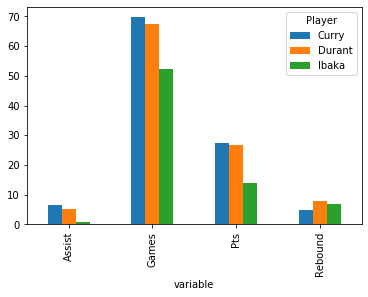

In [60]:
player_stats.unstack(level="Player").plot.bar()

In [56]:
df_wide.stack(level="Player")

variable    Assist                Games                     Pts              \
Team           GSW  OKC  ORL  TOR   GSW   OKC   ORL   TOR   GSW   OKC   ORL   
Year Player                                                                   
2015 Curry     6.7  NaN  NaN  NaN  79.0   NaN   NaN   NaN  30.1   NaN   NaN   
     Durant    NaN  5.0  NaN  NaN   NaN  72.0   NaN   NaN   NaN  28.2   NaN   
     Ibaka     NaN  0.8  NaN  NaN   NaN  78.0   NaN   NaN   NaN  12.6   NaN   
2016 Curry     6.6  NaN  NaN  NaN  79.0   NaN   NaN   NaN  25.3   NaN   NaN   
     Durant    4.8  NaN  NaN  NaN  62.0   NaN   NaN   NaN  25.1   NaN   NaN   
     Ibaka     NaN  NaN  1.1  0.7   NaN   NaN  56.0  23.0   NaN   NaN  15.1   
2017 Curry     6.1  NaN  NaN  NaN  51.0   NaN   NaN   NaN  26.4   NaN   NaN   
     Durant    5.4  NaN  NaN  NaN  68.0   NaN   NaN   NaN  26.4   NaN   NaN   

variable          Rebound                 
Team          TOR     GSW  OKC  ORL  TOR  
Year Player                               
2015 Curry    NaN     5.4  NaN  NaN  NaN  
     Durant   NaN     NaN  8.2  NaN  NaN  
     Ibaka    NaN     NaN  6.8  NaN  NaN  
2016 Curry    NaN     4.5  NaN  NaN  NaN  
     Durant   NaN     8.3  NaN  NaN  NaN  
     Ibaka   14.2     NaN  NaN  6.8  6.8  
2017 Curry    NaN     5.1  NaN  NaN  NaN  
     Durant   NaN     6.8  NaN  NaN  NaN

In [57]:
df_wide.stack(level=["Player", "Team"])

variable          Assist  Games   Pts  Rebound
Year Player Team                              
2015 Curry  GSW      6.7   79.0  30.1      5.4
     Durant OKC      5.0   72.0  28.2      8.2
     Ibaka  OKC      0.8   78.0  12.6      6.8
2016 Curry  GSW      6.6   79.0  25.3      4.5
     Durant GSW      4.8   62.0  25.1      8.3
     Ibaka  ORL      1.1   56.0  15.1      6.8
            TOR      0.7   23.0  14.2      6.8
2017 Curry  GSW      6.1   51.0  26.4      5.1
     Durant GSW      5.4   68.0  26.4      6.8

In [52]:
df2 = df.set_index(["Player", "Year"])
df2

Team  TeamName  Games   Pts  Assist  Rebound
Player Year                                             
Curry  2015  GSW  Warriors     79  30.1     6.7      5.4
       2016  GSW  Warriors     79  25.3     6.6      4.5
       2017  GSW  Warriors     51  26.4     6.1      5.1
Durant 2015  OKC   Thunder     72  28.2     5.0      8.2
       2016  GSW  Warriors     62  25.1     4.8      8.3
       2017  GSW  Warriors     68  26.4     5.4      6.8
Ibaka  2015  OKC   Thunder     78  12.6     0.8      6.8
       2016  ORL     Magic     56  15.1     1.1      6.8
       2016  TOR   Raptors     23  14.2     0.7      6.8

In [53]:
df3 = df2.T
df3

Player       Curry                       Durant                        Ibaka  \
Year          2015      2016      2017     2015      2016      2017     2015   
Team           GSW       GSW       GSW      OKC       GSW       GSW      OKC   
TeamName  Warriors  Warriors  Warriors  Thunder  Warriors  Warriors  Thunder   
Games           79        79        51       72        62        68       78   
Pts           30.1      25.3      26.4     28.2      25.1      26.4     12.6   
Assist         6.7       6.6       6.1        5       4.8       5.4      0.8   
Rebound        5.4       4.5       5.1      8.2       8.3       6.8      6.8   

Player                    
Year       2016     2016  
Team        ORL      TOR  
TeamName  Magic  Raptors  
Games        56       23  
Pts        15.1     14.2  
Assist      1.1      0.7  
Rebound     6.8      6.8

In [62]:
df.head(6).pivot(index="Year", columns="Player", values="Pts")

Player,Curry,Durant
Year,,
2015,30.1,28.2
2016,25.3,25.1
2017,26.4,26.4


In [63]:
bball.head(6).set_index(["Year", "Player"])["Pts"].unstack(level="Player")

Player,Curry,Durant
Year,,
2015,30.1,28.2
2016,25.3,25.1
2017,26.4,26.4


In [64]:
df.pivot_table(index=["Year", "Team"], columns="Player", values="Pts")

Player     Curry  Durant  Ibaka
Year Team                      
2015 GSW    30.1     NaN    NaN
     OKC     NaN    28.2   12.6
2016 GSW    25.3    25.1    NaN
     ORL     NaN     NaN   15.1
     TOR     NaN     NaN   14.2
2017 GSW    26.4    26.4    NaN

In [65]:
df.pivot_table(index="Year", columns=["Player", "Team"], values="Pts")

Player Curry Durant       Ibaka            
Team     GSW    GSW   OKC   OKC   ORL   TOR
Year                                       
2015    30.1    NaN  28.2  12.6   NaN   NaN
2016    25.3   25.1   NaN   NaN  15.1  14.2
2017    26.4   26.4   NaN   NaN   NaN   NaN

In [67]:
bball.pivot_table(index="Year", columns="Player", values="Pts", aggfunc=[max, len])

max                len             
Player Curry Durant Ibaka Curry Durant Ibaka
Year                                        
2015    30.1   28.2  12.6   1.0    1.0   1.0
2016    25.3   25.1  15.1   1.0    1.0   2.0
2017    26.4   26.4   NaN   1.0    1.0   NaN

In [ ]:
https://datascience.quantecon.org/pandas/